In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [17]:
who = pd.read_csv('WHO.csv', header = 0, sep = ',')

In [18]:
who

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2
5,Antigua and Barbuda,Americas,89,25.96,12.35,2.12,75,9.9,196.41,99.0,17900,91.1,84.5
6,Argentina,Americas,41087,24.42,14.97,2.20,76,14.2,134.92,97.8,17130,NaN,NaN
7,Armenia,Europe,2969,20.34,14.06,1.74,71,16.4,103.57,99.6,6100,NaN,NaN
8,Australia,Western Pacific,23050,18.95,19.46,1.89,82,4.9,108.34,NaN,38110,96.9,97.5
9,Austria,Europe,8464,14.51,23.52,1.44,81,4.0,154.78,NaN,42050,NaN,NaN


In [24]:
who.Over60.mean()

11.163659793814434

In [40]:
who_over60 = who.sort('Over60', ascending=1).head(10)

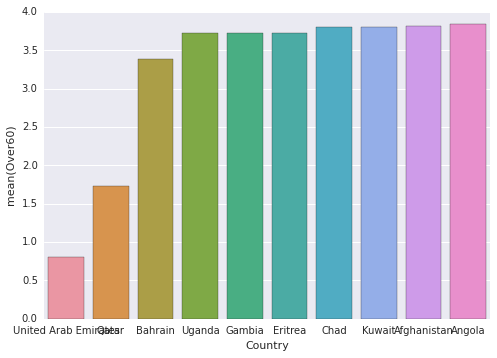

In [41]:
sns.barplot(x=who_over60.Country, y=who_over60.Over60)

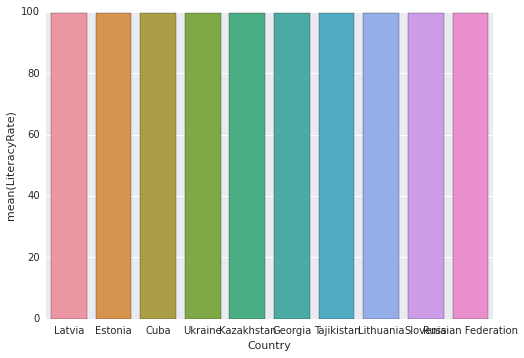

In [39]:
who_lit = who.sort('LiteracyRate', ascending=0).head(10)
sns.barplot(x=who_lit.Country, y=who_lit.LiteracyRate)

In [49]:
who.groupby('Region').ChildMortality.mean()

Region
Africa                   84.036957
Americas                 19.322857
Eastern Mediterranean    40.250000
Europe                   10.050943
South-East Asia          35.045455
Western Pacific          24.711111
Name: ChildMortality, dtype: float64

## Assignment 1

In [3]:
poll = pd.read_csv('AnonymityPoll.csv')

In [52]:
poll.head()

,Internet.Use,Smartphone,Sex,Age,State,Region,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
0,1,0,Male,62,Massachusetts,Northeast,4,0,1,100.000000,0,0,0
1,1,0,Male,45,South Carolina,South,1,1,0,0.000000,1,0,1
2,0,1,Female,70,New Jersey,Northeast,4,0,0,NaN,0,0,NaN
3,1,0,Male,70,Georgia,South,4,3,1,88.888889,1,0,0
4,0,NaN,Female,80,Georgia,South,4,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#How many people participated in the poll?
len(poll)

1002

In [56]:
#How many interviewees responded that they use a smartphone?
len(poll[poll.Smartphone==1])

487

In [57]:
#How many interviewees responded that they don't use a smartphone?
len(poll[poll.Smartphone==0])

472

In [67]:
#How many interviewees did not respond to the question, resulting in a missing value, or NA, in the summary() output?
len(poll[poll.Smartphone.isnull()])

43

In [25]:
#Which of the following are states in the Midwest census region? (Select all that apply.)
pd.crosstab(poll["State"], poll["Region"])

Region,Midwest,Northeast,South,West
State,,,,
Alabama,0,0,11,0
Arizona,0,0,0,24
Arkansas,0,0,10,0
California,0,0,0,103
Colorado,0,0,0,19
Connecticut,0,8,0,0
Delaware,0,0,6,0
District of Columbia,0,0,2,0
Florida,0,0,42,0


In [39]:
#How many interviewees reported not having used the Internet and not having used a smartphone?
pd.crosstab(poll["Internet.Use"], poll["Smartphone"],dropna=True)

Smartphone,0.0,1.0
Internet.Use,,
0,186,17
1,285,470


In [37]:
#How many interviewees have a missing value for their Internet use?
pd.isnull(poll["Internet.Use"]).sum()

1

In [40]:
#How many interviewees have a missing value for their smartphone use?
pd.isnull(poll["Smartphone"]).sum()

43

In [53]:
#How many interviewees are in the new data frame?
poll_new = poll[(poll["Internet.Use"] == 1) | (poll["Smartphone"] == 1)]
len(poll_new)

792